## Observations and Insights 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup

import matplotlib.pyplot as plt  
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how="left")
# Display the data table for preview
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.- unique
mouse_number = combined["Mouse ID"].count()
mouse_number

1893

In [4]:
# Checking the number of Timepoint.- unique
timepoint_number =len(combined["Timepoint"].unique())
timepoint_number

10

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_study_complete.duplicated(subset=None, keep='first')


duplicate_mice =combined.loc[combined.duplicated(subset=['Mouse ID','Timepoint',]), 'Mouse ID'].unique()
duplicate_mice

# duplicate_mice =combined.loc[combined.duplicated(['Mouse ID','Timepoint',])]
# duplicate_mice

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


duplicate_mice_all=pd.DataFrame(duplicate_mice)
duplicate_mice_all

,0
0,g989


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = combined[combined['Mouse ID'].isin(duplicate_mice)==False]
# clean_df
# clean_complete=combined.loc[combined['Mouse ID'] !='g989']
# clean_complete.count()

clean_df= combined.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_df.count()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.

clean_df.loc[:, ["Mouse ID"]].count()

# clean_number_mice.unique()




# clean_number_mice = clean_df["Mouse ID"].count()
# clean_number_mice

Mouse ID    1888
dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumorvl = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

median_tumorvl = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

variance_tumorvl = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

stand_dev_tumorvl = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

sem_tumorvl = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean": mean_tumorvl, "Median": median_tumorvl, "Variance": variance_tumorvl, "Standard Deviation": stand_dev_tumorvl, "SEM": sem_tumorvl })
summary_stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agreg_df =clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)" :['mean', 'median', 'var', 'std', 'sem']})
agreg_df
summary_stats_df = agreg_df
summary_stats_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.382993  50.783528  43.220205  6.574208  0.526358
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
clean_df.head()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


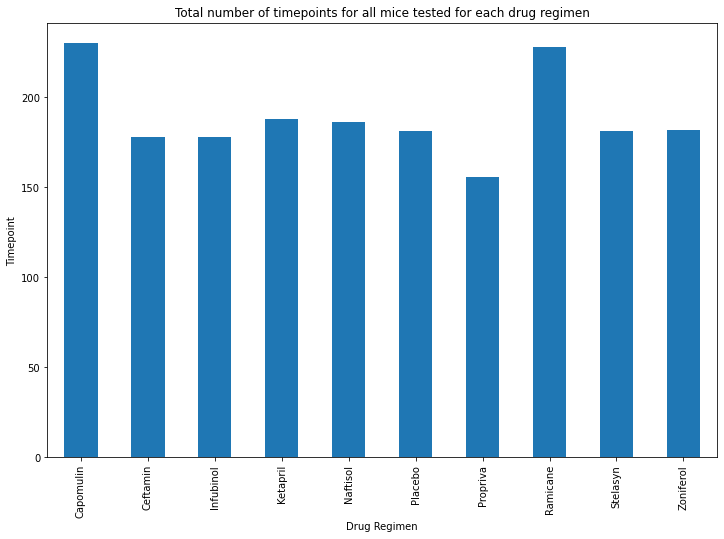

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen = clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()
drug_regimen
drug_regimen_plot = drug_regimen.plot(kind='bar', figsize =(12,8))
drug_regimen_plot.set_xlabel("Drug Regimen")
drug_regimen_plot.set_ylabel("Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.tight_layout
plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.show()


Text(0, 0.5, 'Total Mice')

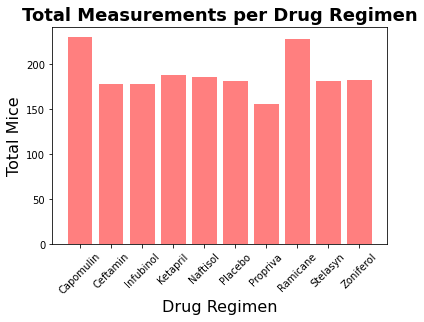

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

y_axis = drug_regimen
x_axis = drug_regimen.index

plt.xticks(rotation = 45)
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")

plt.title("Total Measurements per Drug Regimen",fontsize=18, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=16)
plt.ylabel("Total Mice",fontsize=16)

In [14]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


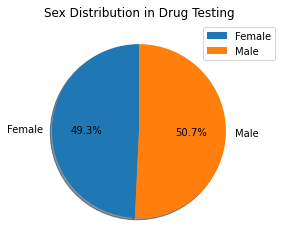

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_female = clean_df.groupby(["Sex"]).count()


pie_chart = male_female.plot(kind="pie", y='Mouse ID', title=("Sex Distribution in Drug Testing"),autopct="%1.1f%%", shadow = True, startangle=90)

pie_chart.set_ylabel("")


pie_chart.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))



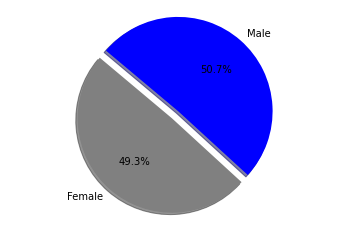

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
x_axis_pie = ['49.3','50.7']
colors = ['gray', 'blue']
explode = (0.1,0)


plt.pie(x_axis_pie, explode= explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# # Start by getting the last (greatest) timepoint for each mouse, use MAX

treatment_regimen_max = combined.groupby(["Mouse ID"])["Timepoint"].max()
treatment_regimen_max

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_drugs = pd.merge(treatment_regimen_max, combined, on=(["Mouse ID","Timepoint"]))
merged_drugs


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

vol_tumor_data =[]


# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    regimen = merged_drugs.loc[merged_drugs["Drug Regimen"] == treatment]
    vol_tumor= regimen['Tumor Volume (mm3)']
    
    # add subset 
    vol_tumor_data.append(vol_tumor)
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mice__plot = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mice__plot.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [ ]:
mouse_b128 = clean_df.loc[clean_df["Mouse ID"] == "b128"]


Text(0, 0.5, 'Tumor Volume (mm3)')

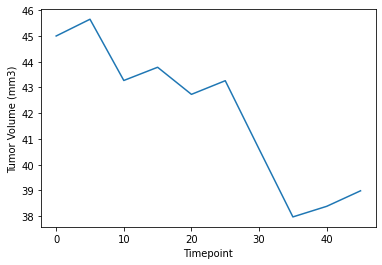

In [ ]:
x_axis_tumor = mouse_b128["Timepoint"]
y_axis_tumor = mouse_b128["Tumor Volume (mm3)"]


plt.plot(x_axis_tumor, y_axis_tumor)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor volume (mm3)')

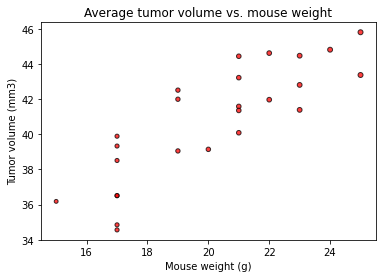

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_cap = mice__plot.groupby(["Mouse ID"]).mean()
avg_cap.head()


#Average tumor volumen
avg_tumor_vol_x = avg_cap["Weight (g)"]
avg_weight_y = avg_cap["Tumor Volume (mm3)"]


plt.scatter(avg_tumor_vol_x, avg_weight_y, marker="o", facecolors="red", edgecolors="black", s=avg_tumor_vol_x, alpha=0.75)

plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84


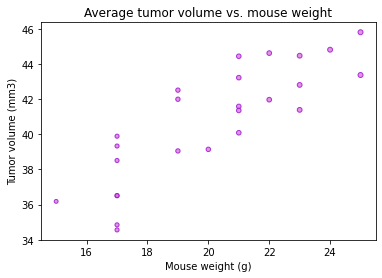

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Equations for correlation and regression
correlation = st.pearsonr(avg_tumor_vol_x,avg_weight_y)


#Using the same scatterplot made before BUT changing colors 
plt.scatter(avg_tumor_vol_x, avg_weight_y, marker="o", facecolors="orchid", edgecolors="darkviolet", s=avg_tumor_vol_x, alpha=0.75)
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")
plt.title( "Average tumor volume vs. mouse weight")
print(f"The correlation between both factors is {round(correlation[0],2)}")
